[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [56]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

update-alternatives: renaming python3 link from /usr/bin/python3 to /usr/local/bin/python3
update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Python 3.8.20
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.il

In [80]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
--2025-10-06 03:07:58--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-06T03%3A54%3A37Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-06T02%3A53%3A44Z&ske=2025-10-06T03%3A54%3A37Z&sks=b&skv=2018-11-09&sig=q0fv6p%2BM8rbVOJ7OV0qpzhduRmGUO4HL4Qi96K84FkI%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1OTcyMzY3OCwibmJmI

Choose the image name to animate: (saved in folder 'examples/source_image/')


Dropdown(options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art_16', 'art…

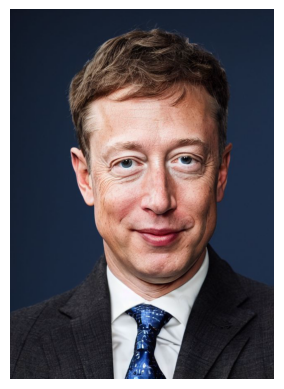

In [91]:
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt

print("Choose the image name to animate: (saved in folder 'examples/source_image/')")

img_list = []
for ext in ["*.png", "*.jpg", "*.jpeg", "*.webp", "*.bmp"]:
    img_list.extend(glob.glob1('examples/source_image', ext))

img_list.sort()
img_list_no_ext = [item.rsplit('.', 1)[0] for item in img_list]

default_head_name = widgets.Dropdown(options=img_list_no_ext, value=img_list_no_ext[0])

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        img_path = glob.glob(f"examples/source_image/{change['new']}.*")[0]
        plt.imshow(plt.imread(img_path))
        plt.axis('off')
        plt.show()

default_head_name.observe(on_change, names='value')
display(default_head_name)

img_path = glob.glob(f"examples/source_image/{default_head_name.value}.*")[0]
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show()


Saving 2nksd.jpeg to 2nksd.jpeg
Đã lưu 2nksd.jpeg vào examples/source_image/

Choose the image name to animate: (saved in folder 'examples/source_image/')


Dropdown(options=('2nksd', 'art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art_…

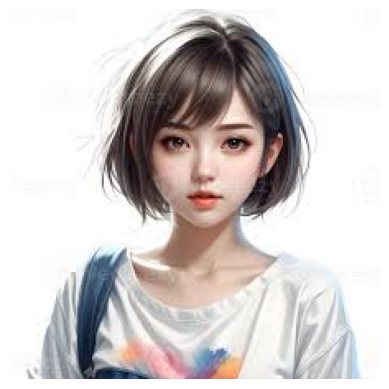

In [121]:
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
from google.colab import files
import shutil
import os

# Upload file
uploaded = files.upload()
for fname in uploaded.keys():
    shutil.move(fname, "examples/source_image/")
    print(f"Đã lưu {fname} vào examples/source_image/")

print("\nChoose the image name to animate: (saved in folder 'examples/source_image/')")

# Lấy danh sách ảnh
img_list = []
for ext in ["*.png", "*.jpg", "*.jpeg", "*.webp", "*.bmp"]:
    img_list.extend(glob.glob1('examples/source_image', ext))

img_list.sort()
img_list_no_ext = [item.rsplit('.', 1)[0] for item in img_list]

# Dropdown chọn ảnh
default_head_name = widgets.Dropdown(options=img_list_no_ext, value=img_list_no_ext[0])

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        img_path = glob.glob(f"examples/source_image/{change['new']}.*")[0]
        plt.imshow(plt.imread(img_path))
        plt.axis('off')
        plt.show()

default_head_name.observe(on_change, names='value')
display(default_head_name)

# Hiển thị ảnh đầu tiên mặc định
img_path = glob.glob(f"examples/source_image/{default_head_name.value}.*")[0]
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show()


Animation

In [129]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.jpeg'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/2nksd.jpeg
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 15.51it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 53.05it/s]
mel:: 100% 200/200 [00:00<00:00, 41288.62it/s]
audio2exp:: 100% 20/20 [00:00<00:00, 304.76it/s]
Face Renderer:: 100% 100/100 [01:00<00:00,  1.66it/s]
The generated video is named ./results/2025_10_06_03.59.27/2nksd##RD_Radio31_000.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100% 200/200 [00:02<00:00, 66.81it/s]
The generated video is named ./results/2025_10_06_03.59.27/2nksd##RD_Radio31_000_full.mp4
face enhancer....
Face Enhancer:: 100% 200/200 [01:06<00:00,  2.99it/s]
The generated video is named ./results/2025_10_06_03.59.27/2nksd##RD_Radio31_000_enhanced.mp4
The generated video is named: ./results/2025_10_06_03.59.27.mp4


In [138]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=250 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2025_10_06_03.51.25.mp4
